In [119]:

import warnings
warnings.filterwarnings('ignore')

In [120]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import graphviz

In [121]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [122]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [123]:
train.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12        

In [124]:
train_null_pc= train.isnull().sum()/len(train)*100
train_null_pc =train_null_pc[train_null_pc>0]
train_null_pc

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [125]:
train =train.drop(columns=['Id'])


In [126]:
train = train.dropna(subset=['Electrical','GarageYrBlt'])

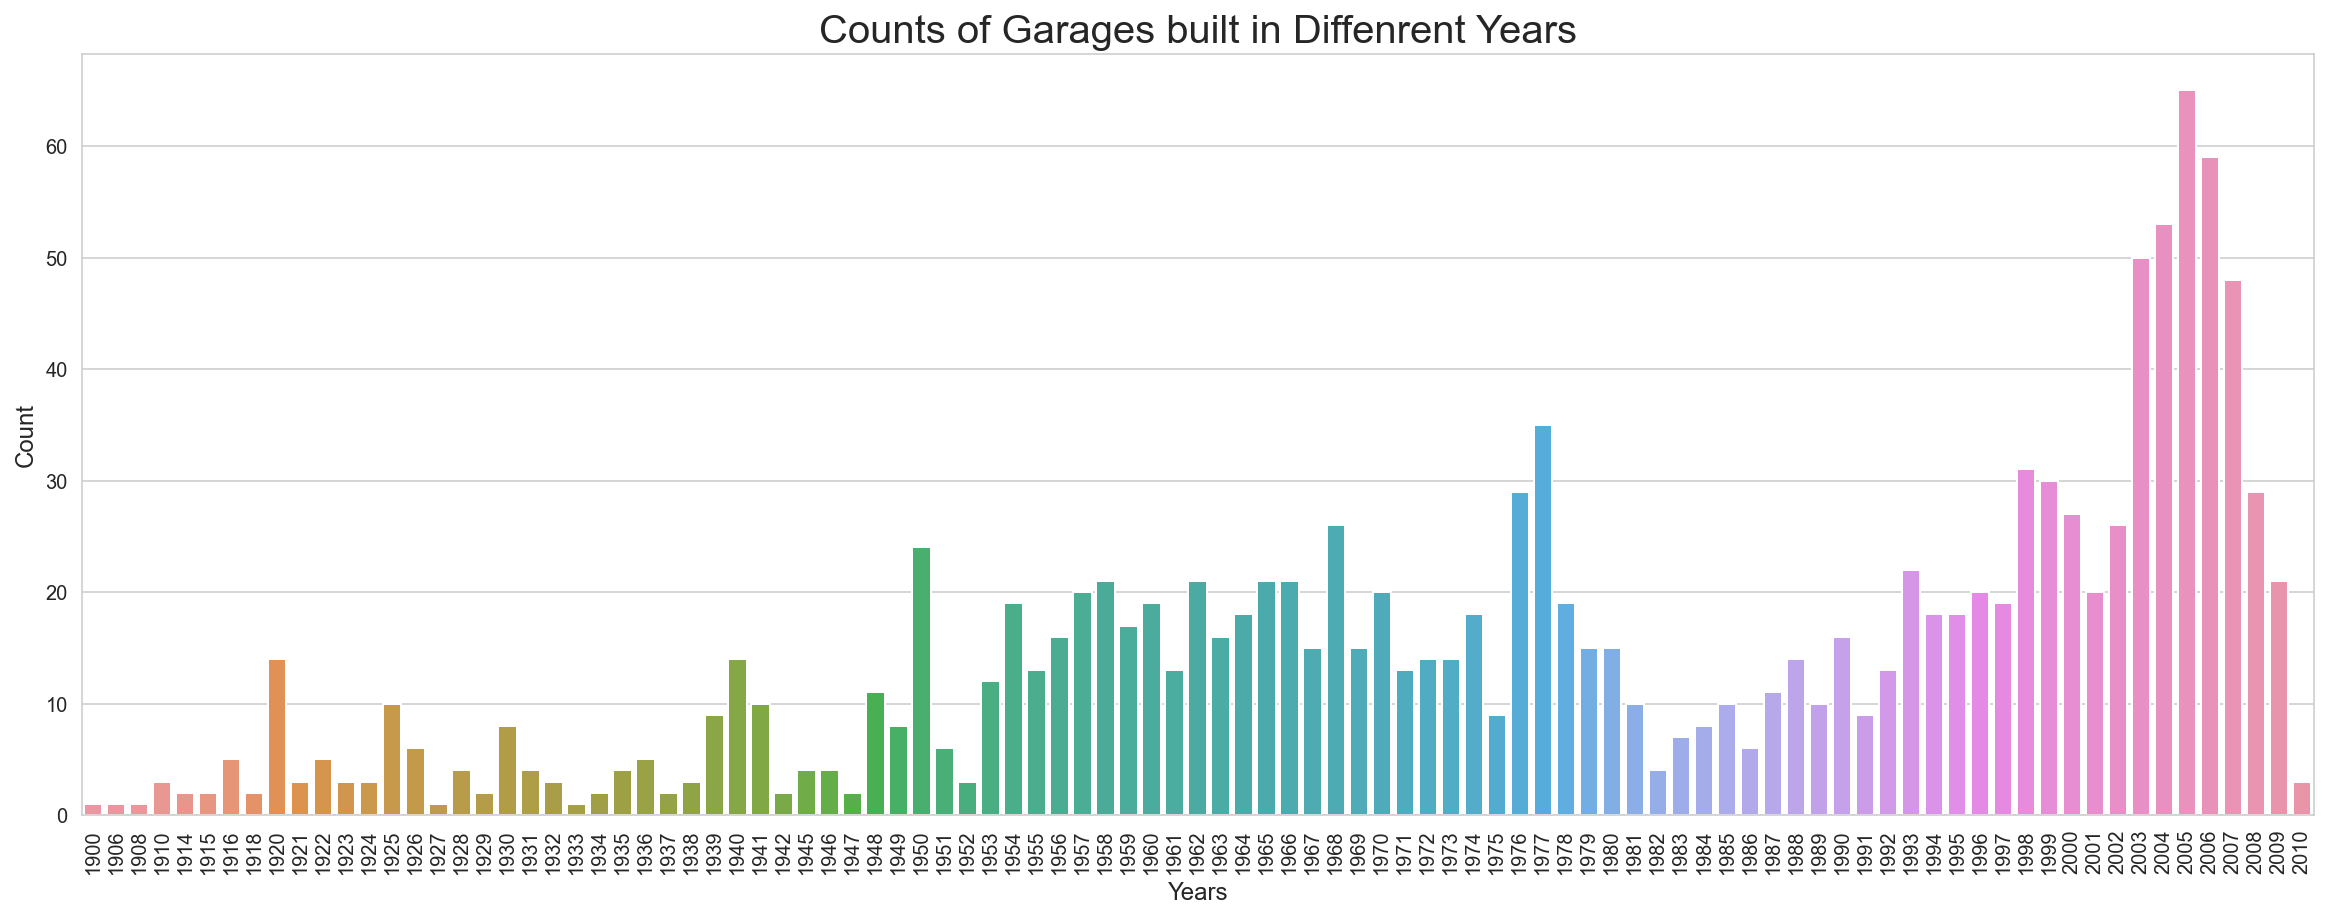

In [127]:
train.GarageYrBlt= train.GarageYrBlt.astype('int')

plt.figure(figsize=[20,7])
sns.countplot(train.GarageYrBlt)
plt.title('Counts of Garages built in Diffenrent Years', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

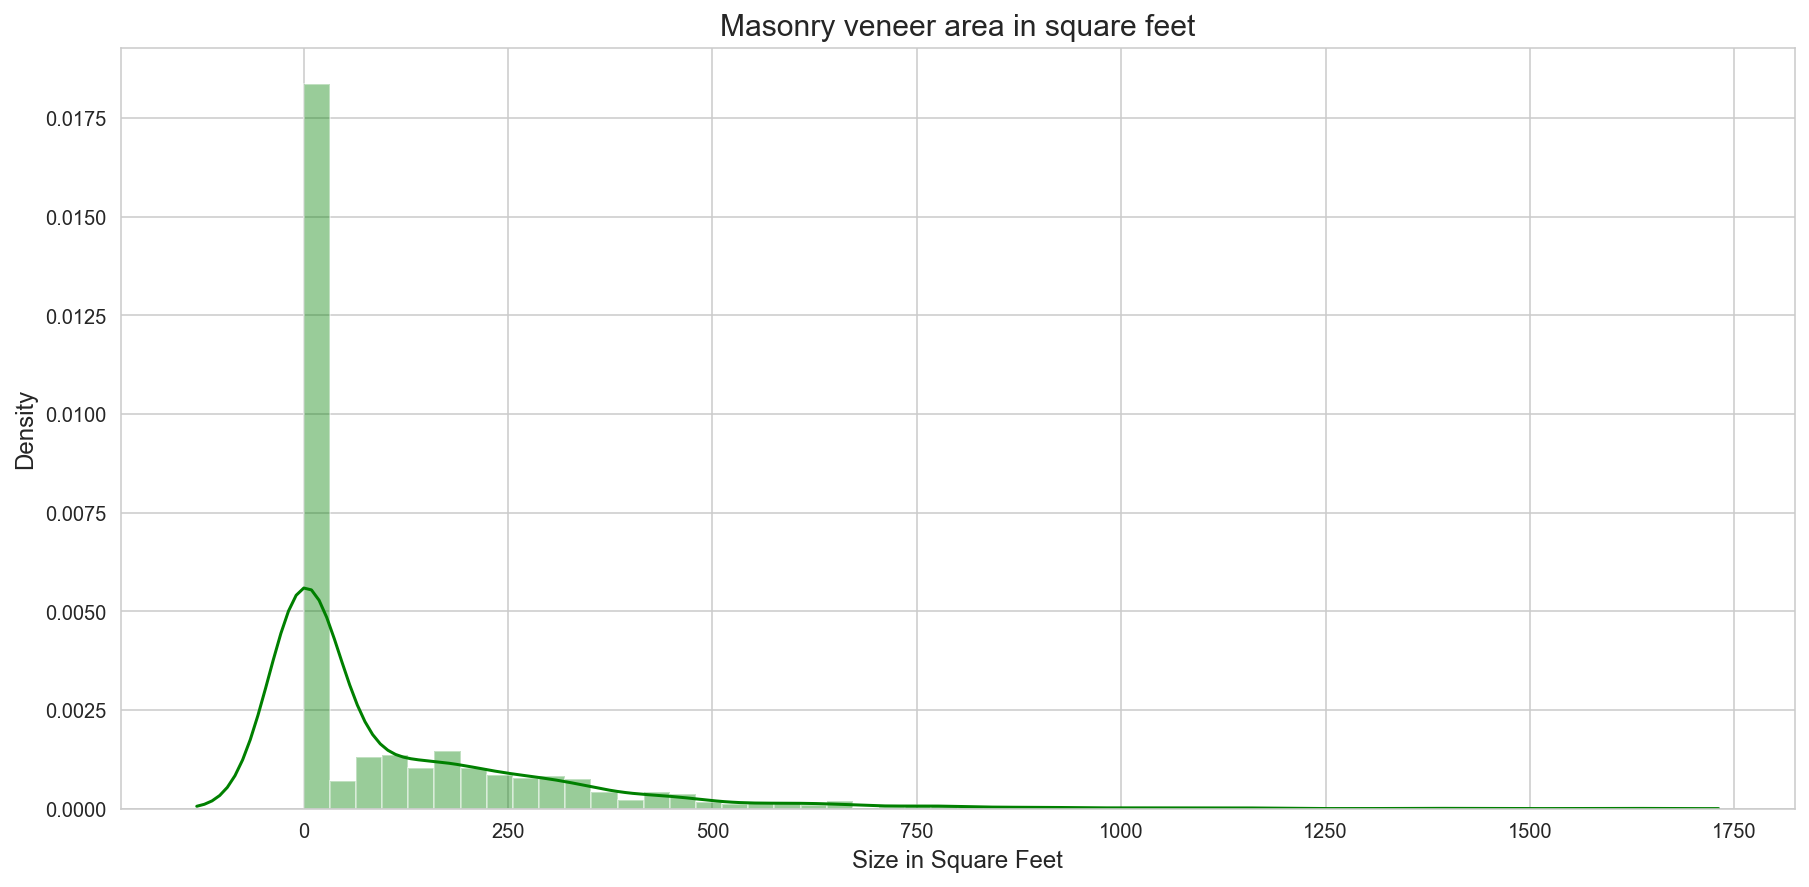

In [128]:
plt.figure(figsize=[15,7])
sns.distplot(train.MasVnrArea, color='g')
plt.title('Masonry veneer area in square feet', fontsize=15)
plt.xlabel('Size in Square Feet', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

In [129]:
train.MasVnrArea=train.MasVnrArea.fillna(train.MasVnrArea.median())


In [130]:
plt.figure(figsize=[15,7])
sns.displot(train.LotFrontage, color='r')
plt.title('Lnear feet of street connected to property', fontsize=15)
plt.xlabel('Size in linear feet', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

<Figure size 1080x504 with 0 Axes>

In [131]:
train.LotFrontage = train.LotFrontage.fillna(train.LotFrontage.median())

In [132]:
train_null_pc= train.isnull().sum()/len(train)*100
train_null_pc= train_null_pc[train_null_pc>0]
train_null_pc

Alley           94.049347
MasVnrType       0.580552
BsmtQual         2.177068
BsmtCond         2.177068
BsmtExposure     2.249637
BsmtFinType1     2.177068
BsmtFinType2     2.249637
FireplaceQu     44.775036
PoolQC          99.492017
Fence           80.769231
MiscFeature     96.298984
dtype: float64

In [133]:
test.shape

(1459, 80)

In [134]:
test_null_pc = test.isnull().sum()
test_null_pc[test_null_pc>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [135]:
test_bsmt =test.filter(regex='Bsmt')
test_bsmt_num =test_bsmt.select_dtypes(exclude='object')
test_bsmt_cat= test_bsmt.select_dtypes(include='object')

test[test_bsmt_cat.columns] = test[test_bsmt_cat.columns].fillna('No Basement')
test[test_bsmt_num.columns] = test[test_bsmt_num.columns].fillna(0)


In [136]:
test_gar = test.filter(regex='Garage')
test_gar_num = test_gar.select_dtypes(exclude='object')
test_gar_cat = test_gar.select_dtypes(include='object')

test[test_gar_cat.columns] = test[test_gar_cat.columns].fillna('No Garage')
test[test_gar_num.columns] = test[test_gar_num.columns].fillna(0)

In [137]:
test.FireplaceQu = test.FireplaceQu.fillna('No Fireplace')

# here NA is No alley access 
test.Alley = test.Alley.fillna('No alley access')

# here NA is No pool
test.PoolQC = test.PoolQC.fillna('No Pool')

# here NA is No fence
test.Fence = test.Fence.fillna('No Fence')

# No Masonry veneer type
test.MasVnrType = test.MasVnrType.fillna('None')

# No Masonry veneer type so area would be 0
test.MasVnrArea = test.MasVnrArea.fillna(0)


test.MiscFeature = test.MiscFeature.fillna('None')


In [138]:
test_null_pc= test.isnull().sum()
test_null_pc[test_null_pc>0]

MSZoning         4
LotFrontage    227
Utilities        2
Exterior1st      1
Exterior2nd      1
KitchenQual      1
Functional       2
SaleType         1
dtype: int64

In [139]:
train.MoSold = train.MoSold.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct',11:'Nov',12:'Dec'})


In [140]:
train_num =train.select_dtypes(exclude='object').copy()
train_obj=train.select_dtypes(include='object').copy()
test_obj=test.select_dtypes(include='object').copy()


In [141]:
train_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0         2003           2         548           0           61   
1         1976           2         460         298            0   
2         2001           2         608           0           42   
3         1998           3         642           0           35   
4         2000           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  YrSold  SalePrice  
0              0          0            0         0        0    2008     208500  
1              0          0            0         0        0    2007     181500  
2              0          0            0         0        0    2008     223500  
3            272          0            0         0        0    2006     140000  
4              0          0            0         0        0    2008     250000

In [142]:
plt.figure(figsize=(20,3))
sns.boxplot(train.LotArea, palette='Set3')
plt.title('IQR and Outliers in House sale Price', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.show()

In [143]:
plt.figure(figsize=(20, 3))
sns.boxplot(train.SalePrice, palette="Set1")
plt.title('IQR and Outliers in House Sale Price', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.show()

In [144]:
train.SalePrice.quantile([0.25,0.5,0.75,0.9,0.95,0.99])

0.25    134000.00
0.50    167700.00
0.75    217875.00
0.90    281725.70
0.95    335000.00
0.99    447569.47
Name: SalePrice, dtype: float64

In [145]:
plt.figure(figsize=(20, 15))
plt.subplot(2,1,1)
sns.boxplot(x=train.OverallQual, y=train.SalePrice, palette="rocket").set(xlabel='Overall material and finish of the house')
plt.subplot(2,1,2)
sns.boxplot(x=train.OverallCond, y=train.SalePrice, palette='viridis').set(xlabel='Overall condition of the house')
plt.suptitle('Distributions of Variables',fontsize=20)
plt.show()

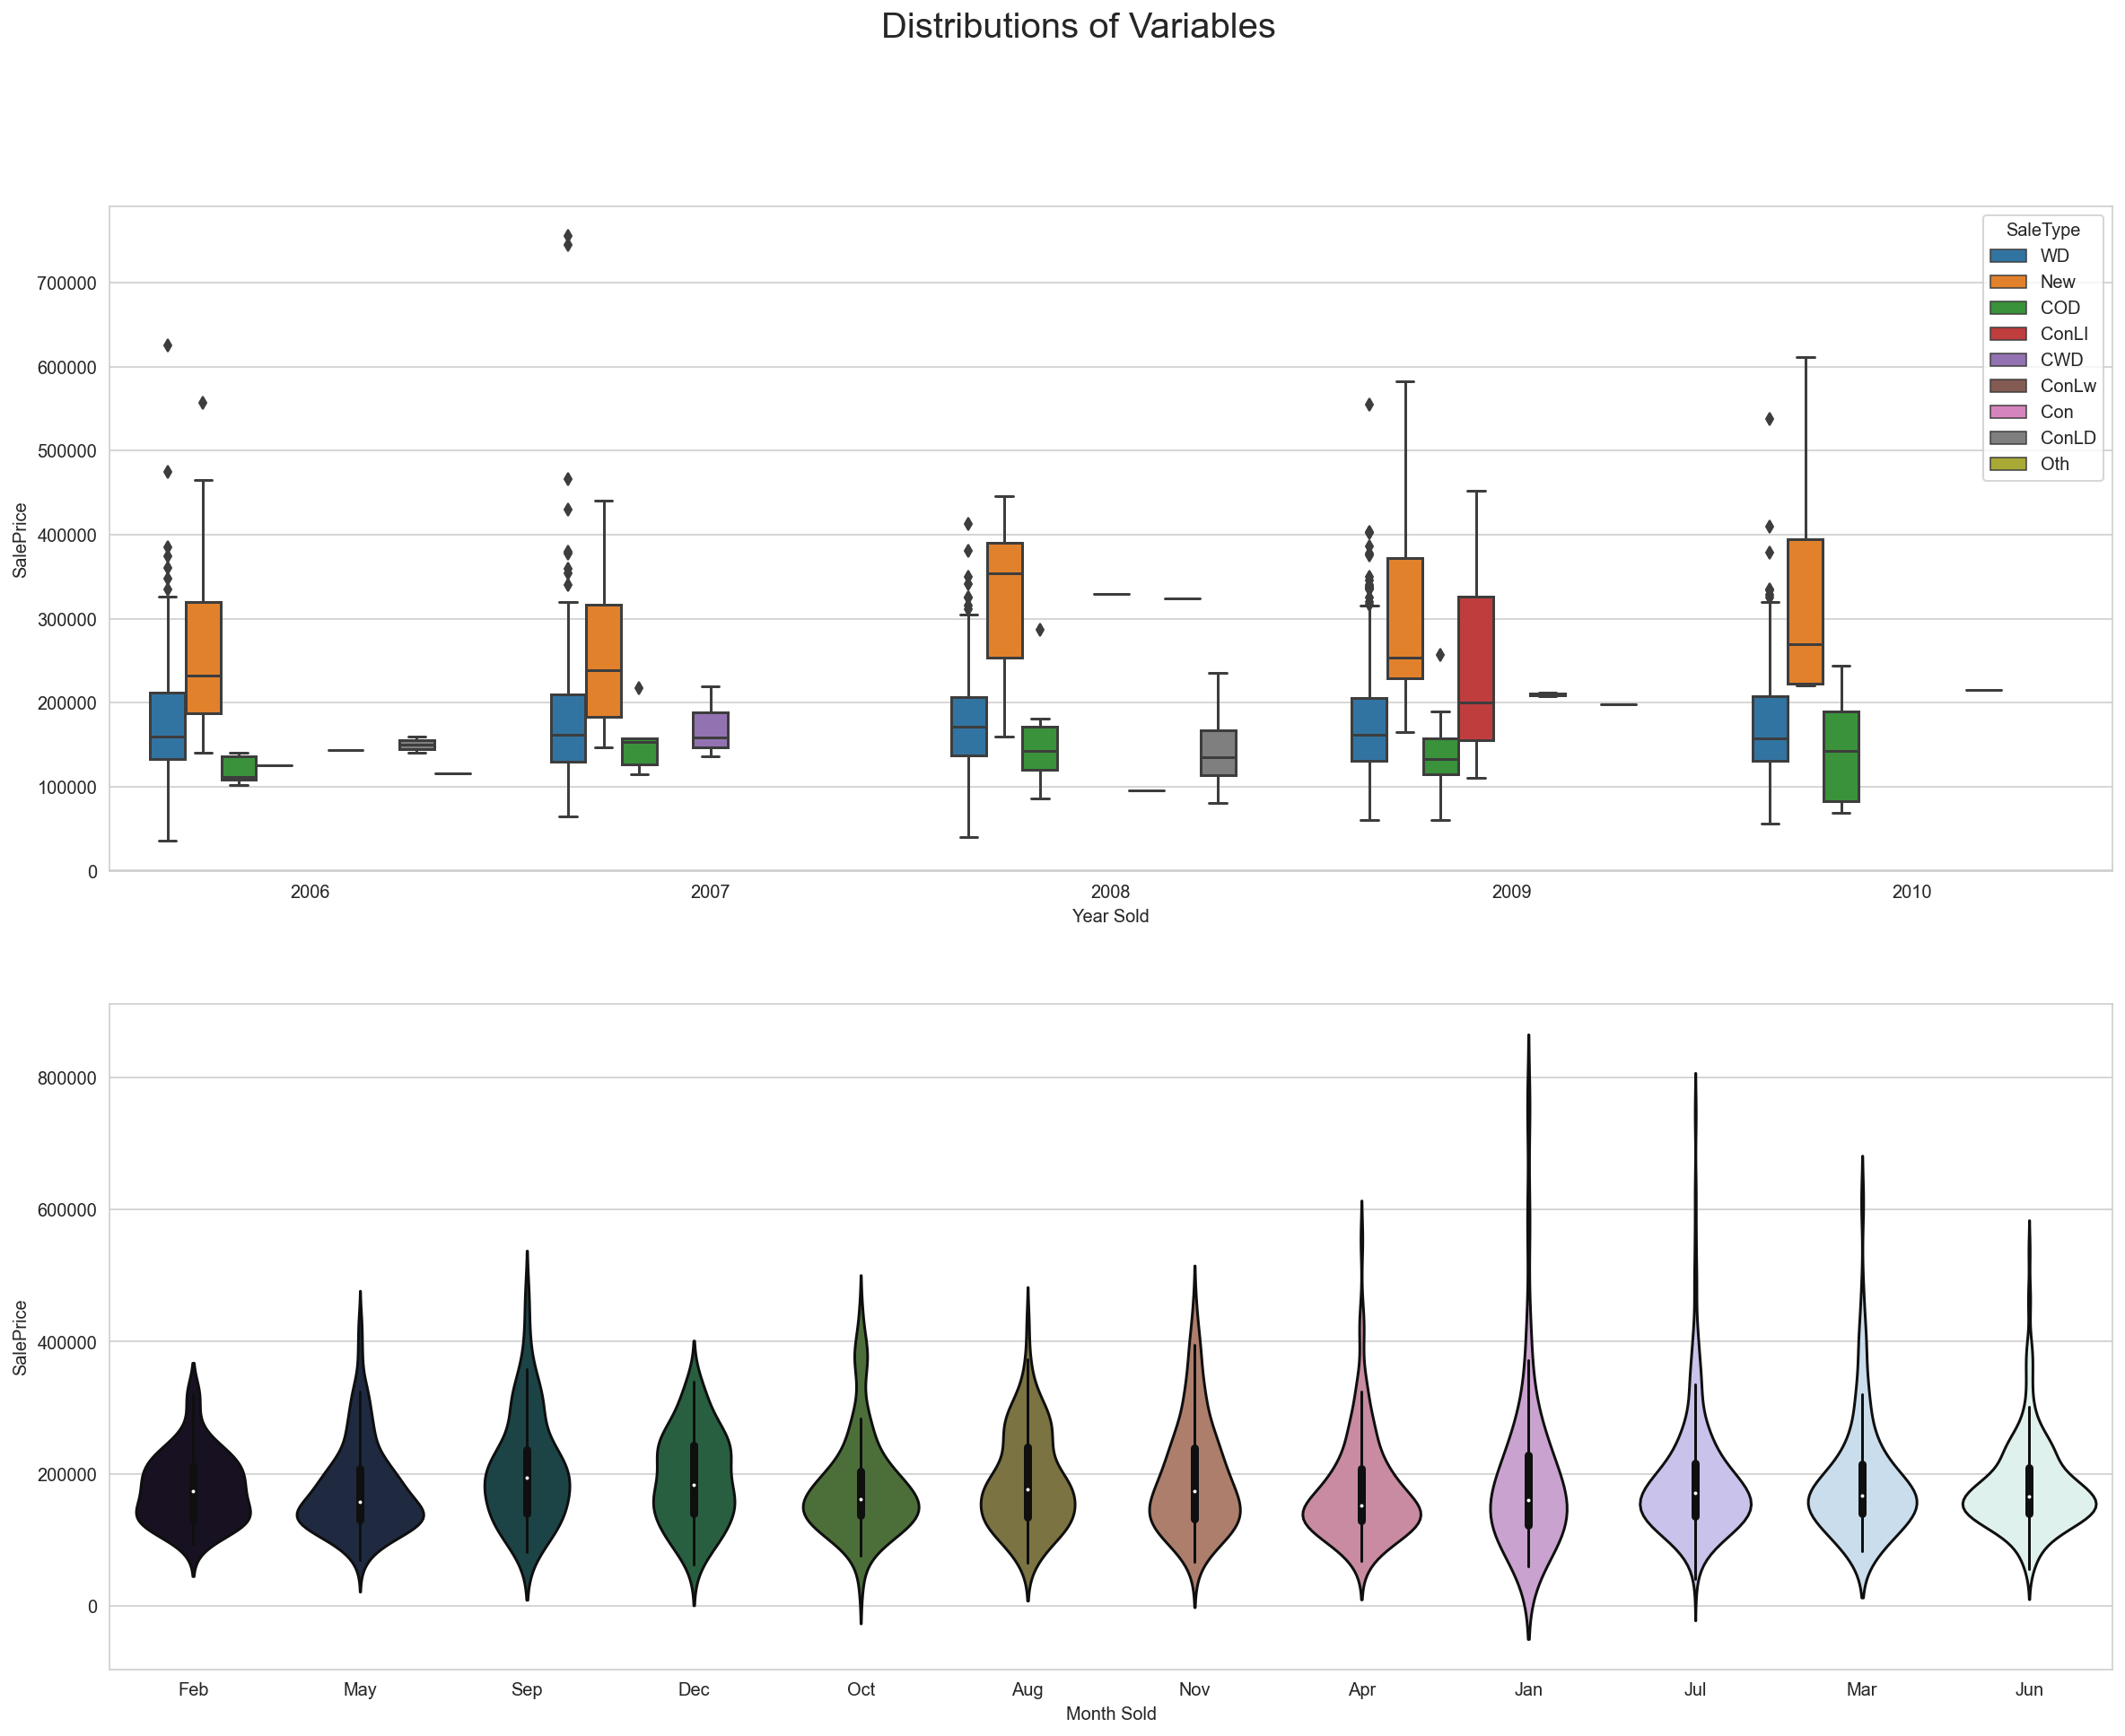

In [146]:
plt.figure(figsize=(20, 15))
plt.subplot(2,1,1)
sns.boxplot(x=train.YrSold, y=train.SalePrice, hue=train.SaleType).set(xlabel='Year Sold')
plt.subplot(2,1,2)
sns.violinplot(x=train.MoSold, y=train.SalePrice, palette='cubehelix').set(xlabel='Month Sold')
plt.suptitle('Distributions of Variables',fontsize=20)
plt.show()

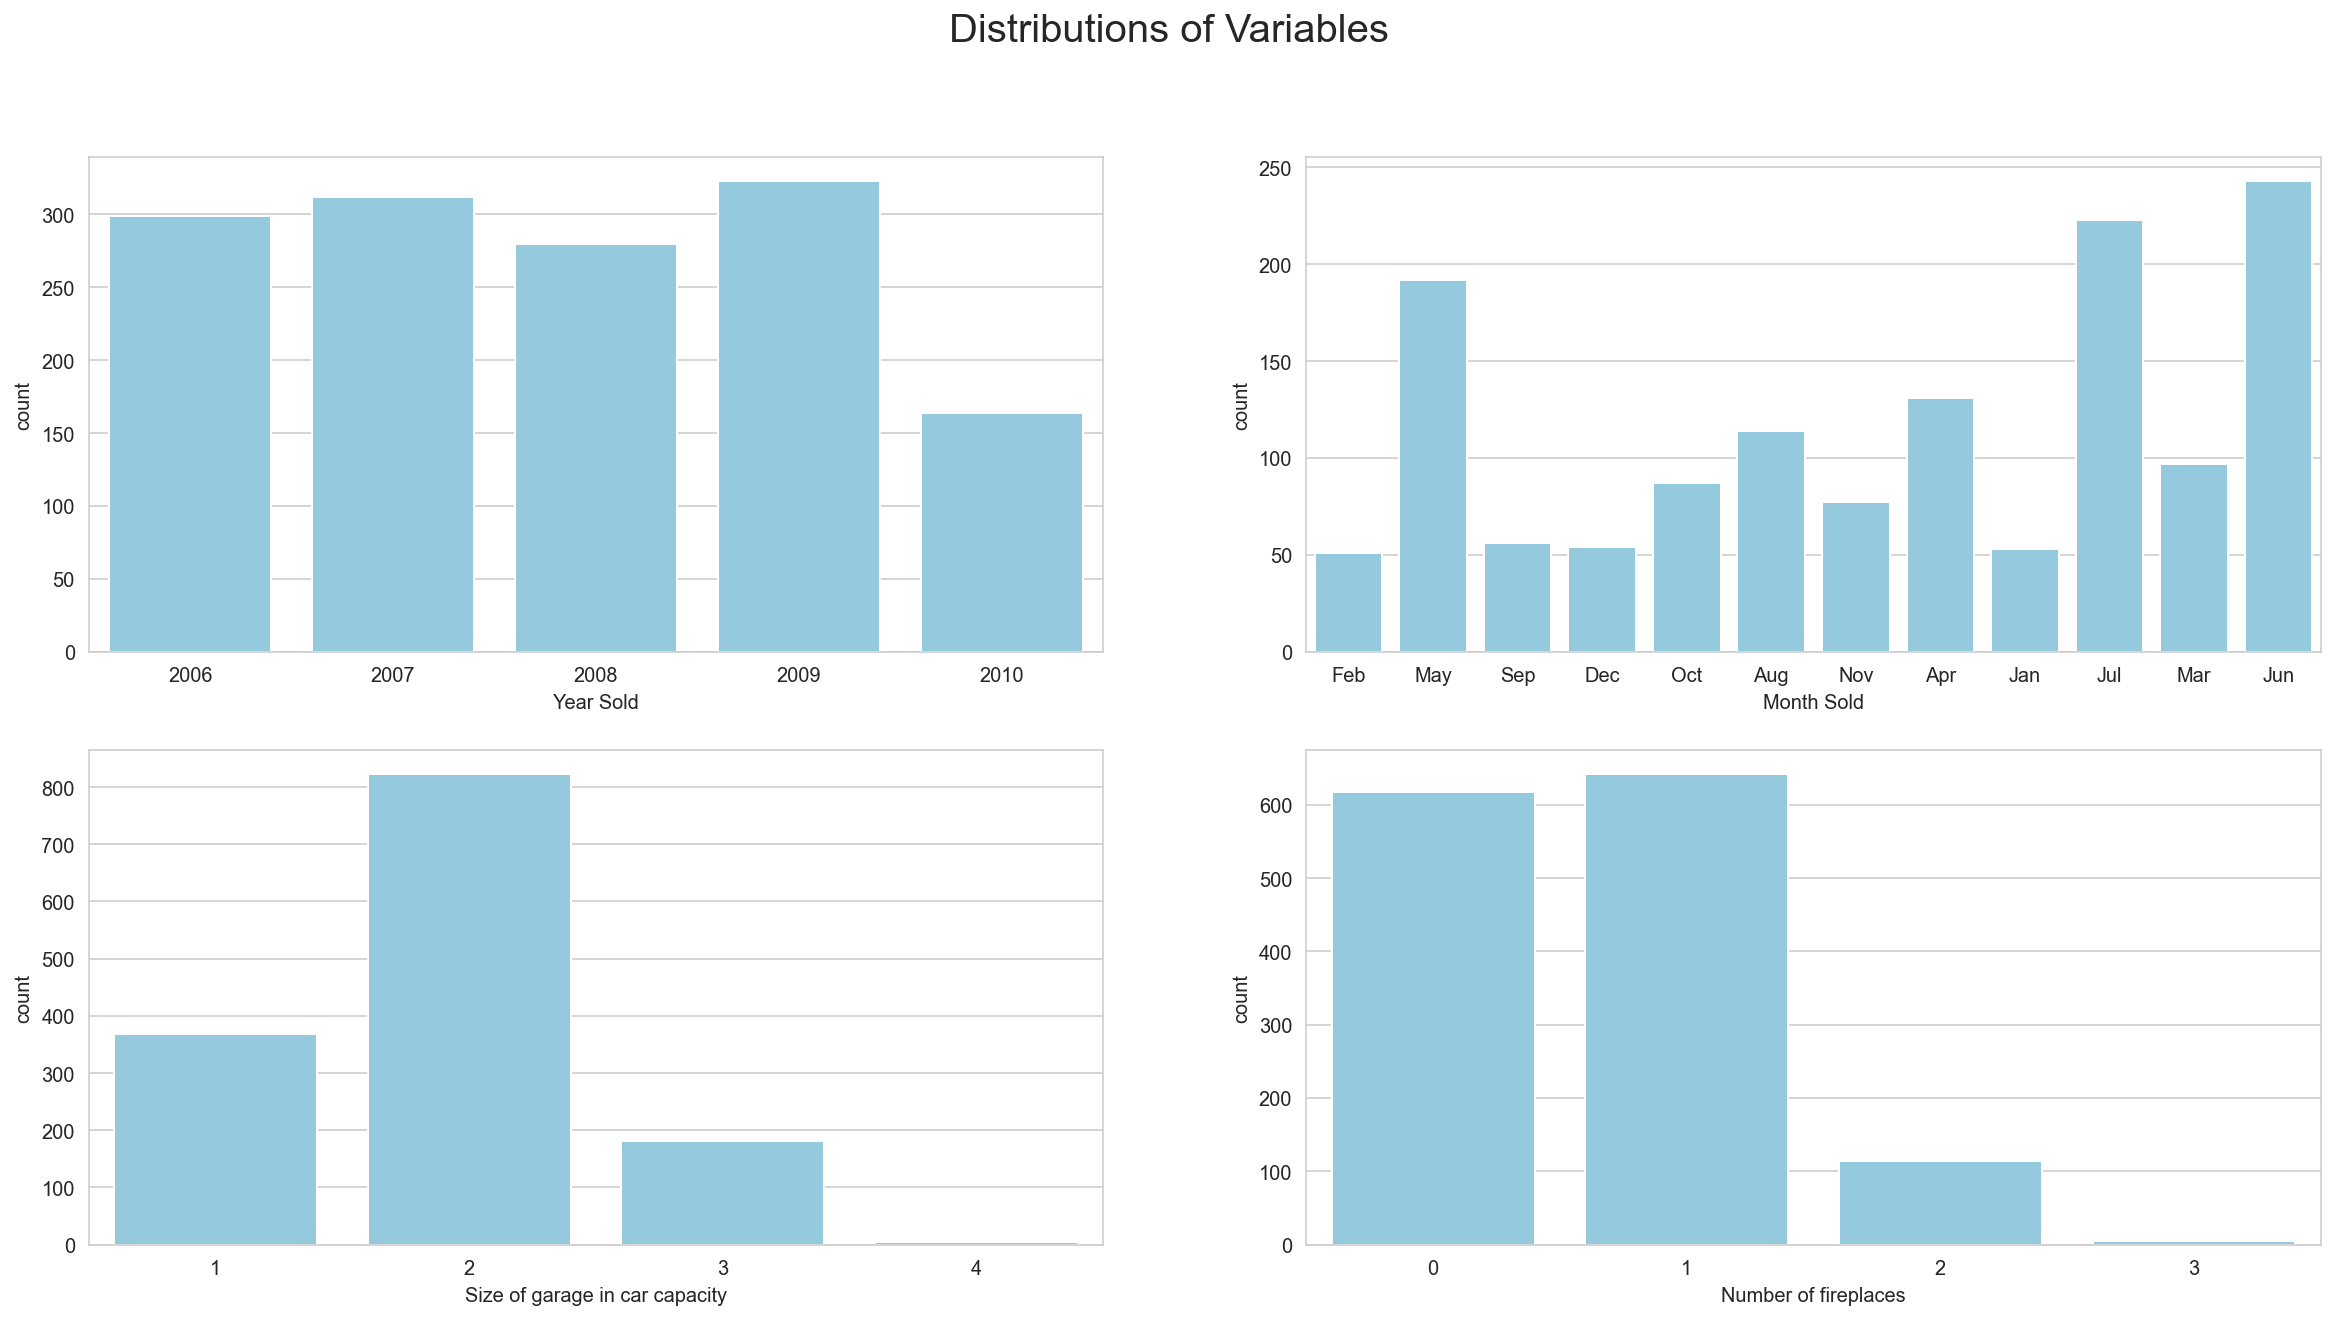

In [147]:
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.countplot(train.YrSold, color='skyblue').set(xlabel='Year Sold')
plt.subplot(2,2,2)
sns.countplot(train.MoSold, color='skyblue').set(xlabel='Month Sold')
plt.subplot(2,2,3)
sns.countplot(train.GarageCars, color='skyblue').set(xlabel='Size of garage in car capacity')
plt.subplot(2,2,4)
sns.countplot(train.Fireplaces, color='skyblue').set(xlabel='Number of fireplaces')
plt.suptitle('Distributions of Variables',fontsize=20)
plt.show()

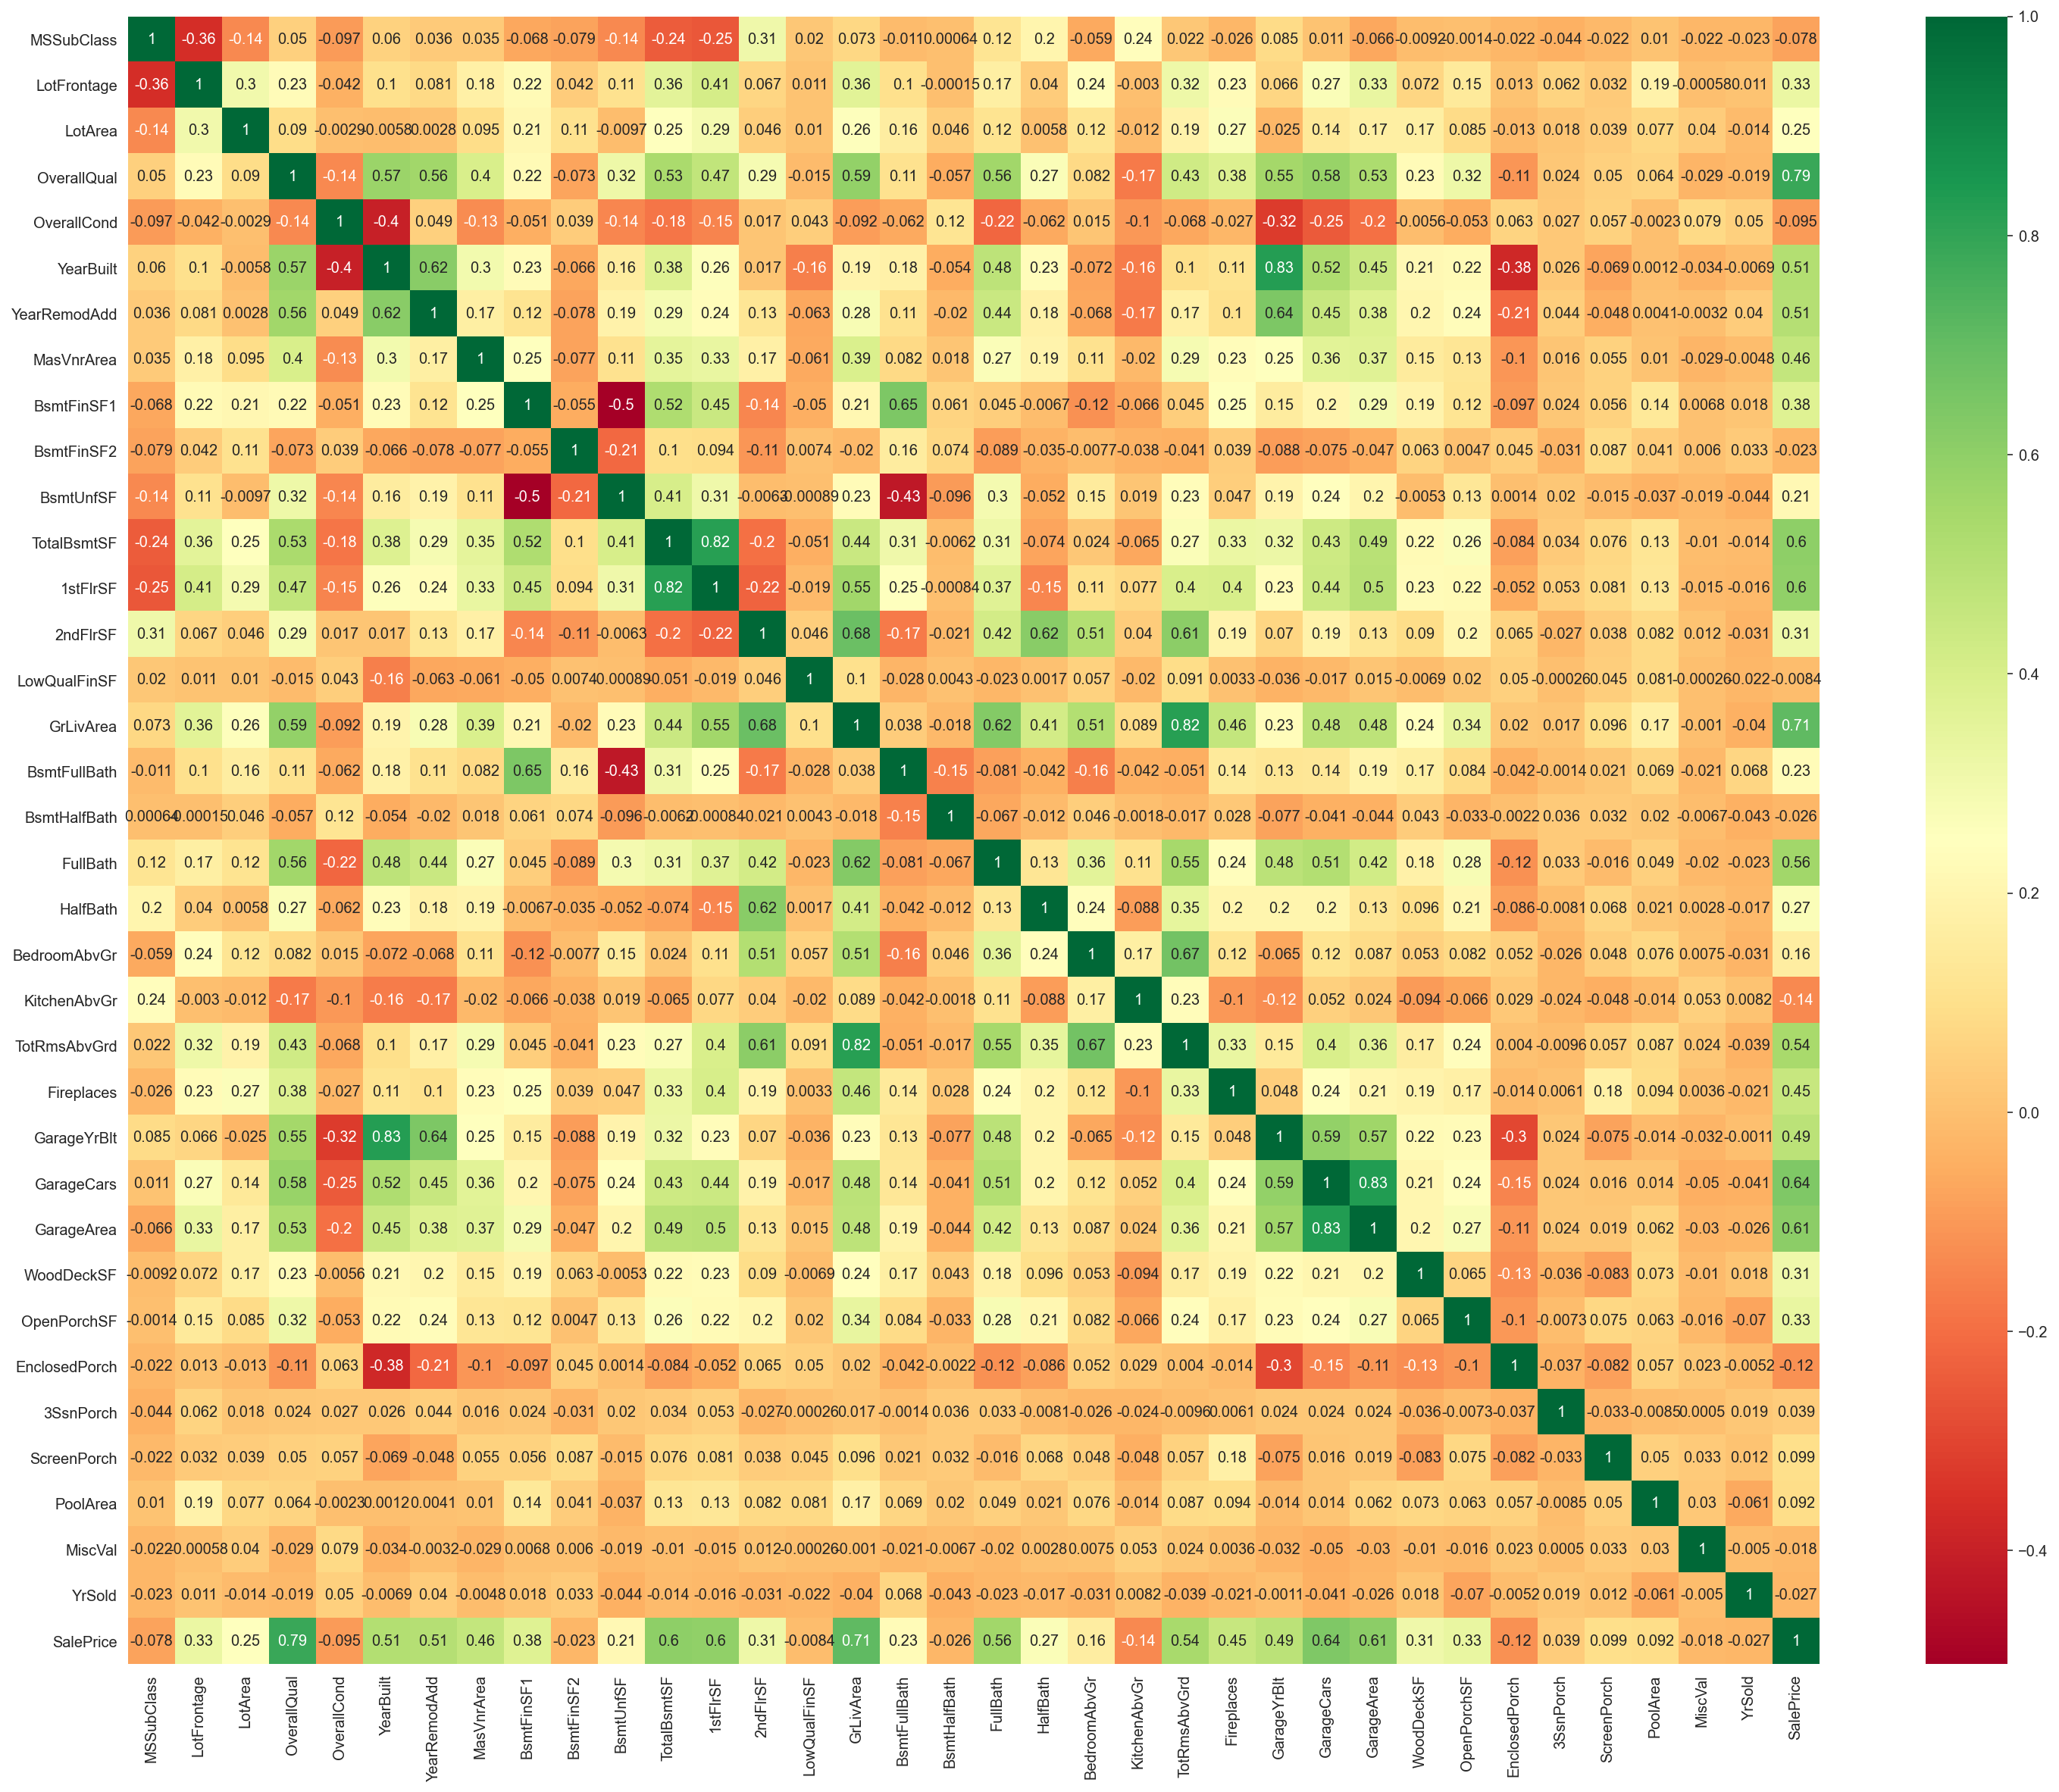

In [148]:
plt.figure(figsize=(25, 20))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [149]:
train_obj.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  MoSold SaleType SaleCondition  
0    Feb       WD        Normal  
1    May       WD        Normal  
2    Sep       WD        Normal  
3    Feb       WD       Abnorml  
4    Dec       WD        Normal

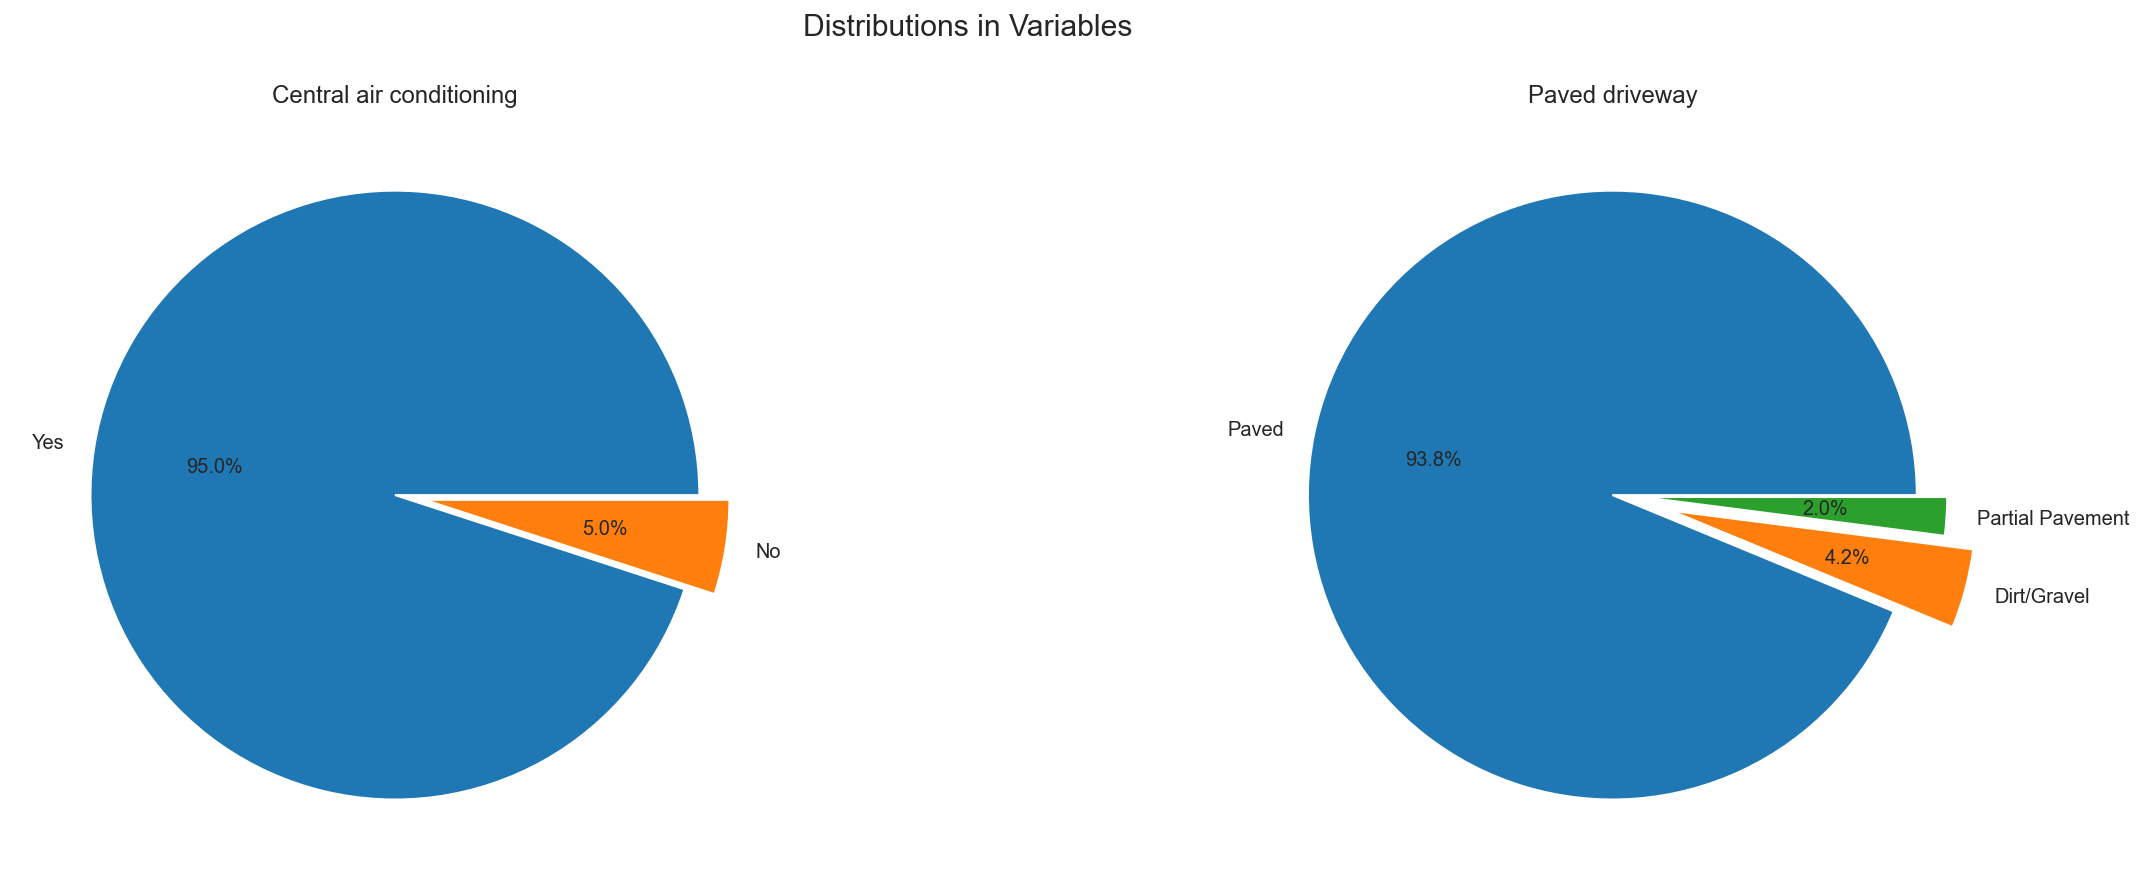

In [150]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
plt.pie(train.CentralAir.value_counts(),explode=(0,0.1), labels=['Yes', 'No'],autopct='%1.1f%%')
plt.title('Central air conditioning',fontsize=12)
plt.subplot(1,2,2)
plt.pie(train.PavedDrive.value_counts(),explode=(0,0.2,0.1), labels=['Paved','Dirt/Gravel','Partial Pavement'],autopct='%1.1f%%')
plt.title('Paved driveway',fontsize=12)
plt.suptitle('Distributions in Variables',fontsize=15)
plt.show()

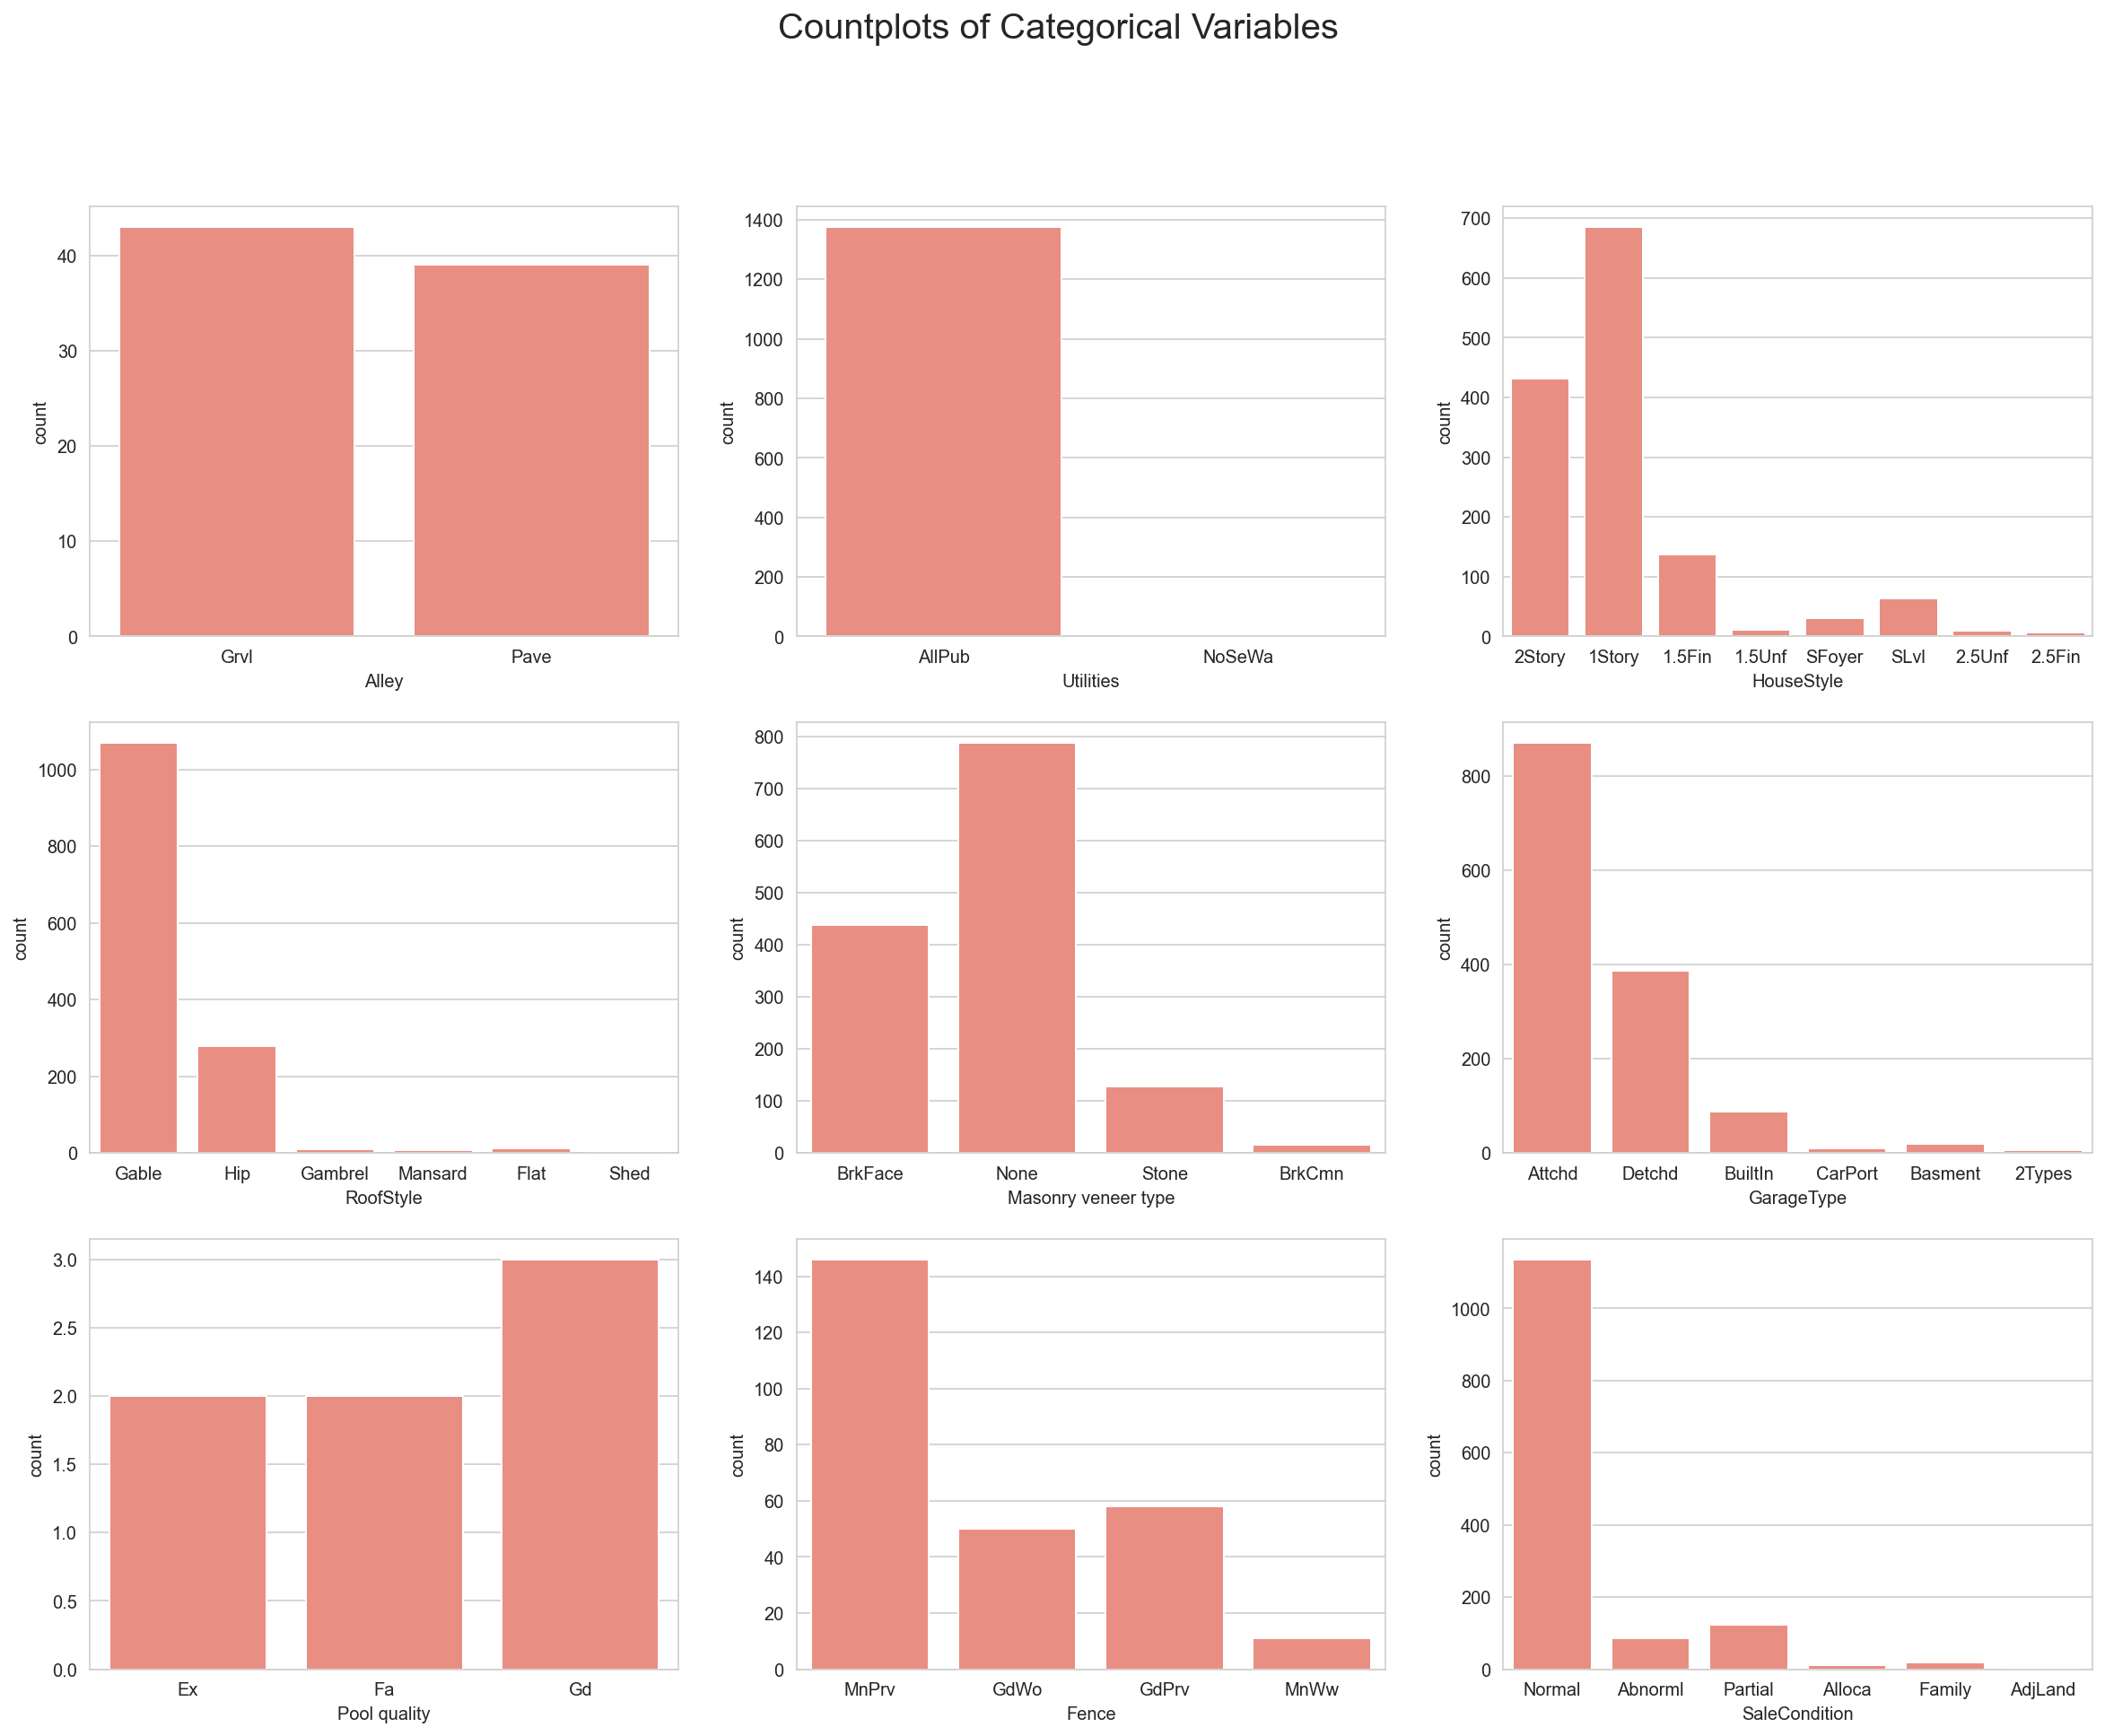

In [151]:
# Countplots of Categorical Variables to see differences

plt.figure(figsize=[20,15])
plt.subplot(3,3,1)
sns.countplot(train.Alley, color='salmon')
plt.subplot(3,3,2)
sns.countplot(train.Utilities, color='salmon')
plt.subplot(3,3,3)
sns.countplot(train.HouseStyle, color='salmon')
plt.subplot(3,3,4)
sns.countplot(train.RoofStyle, color='salmon')
plt.subplot(3,3,5)
sns.countplot(train.MasVnrType, color='salmon').set(xlabel='Masonry veneer type')
plt.subplot(3,3,6)
sns.countplot(train.GarageType, color='salmon')
plt.subplot(3,3,7)
sns.countplot(train.PoolQC, color='salmon').set(xlabel='Pool quality')
plt.subplot(3,3,8)
sns.countplot(train.Fence, color='salmon')
plt.subplot(3,3,9)
sns.countplot(train.SaleCondition, color='salmon')
plt.suptitle('Countplots of Categorical Variables',fontsize=20)
plt.show()

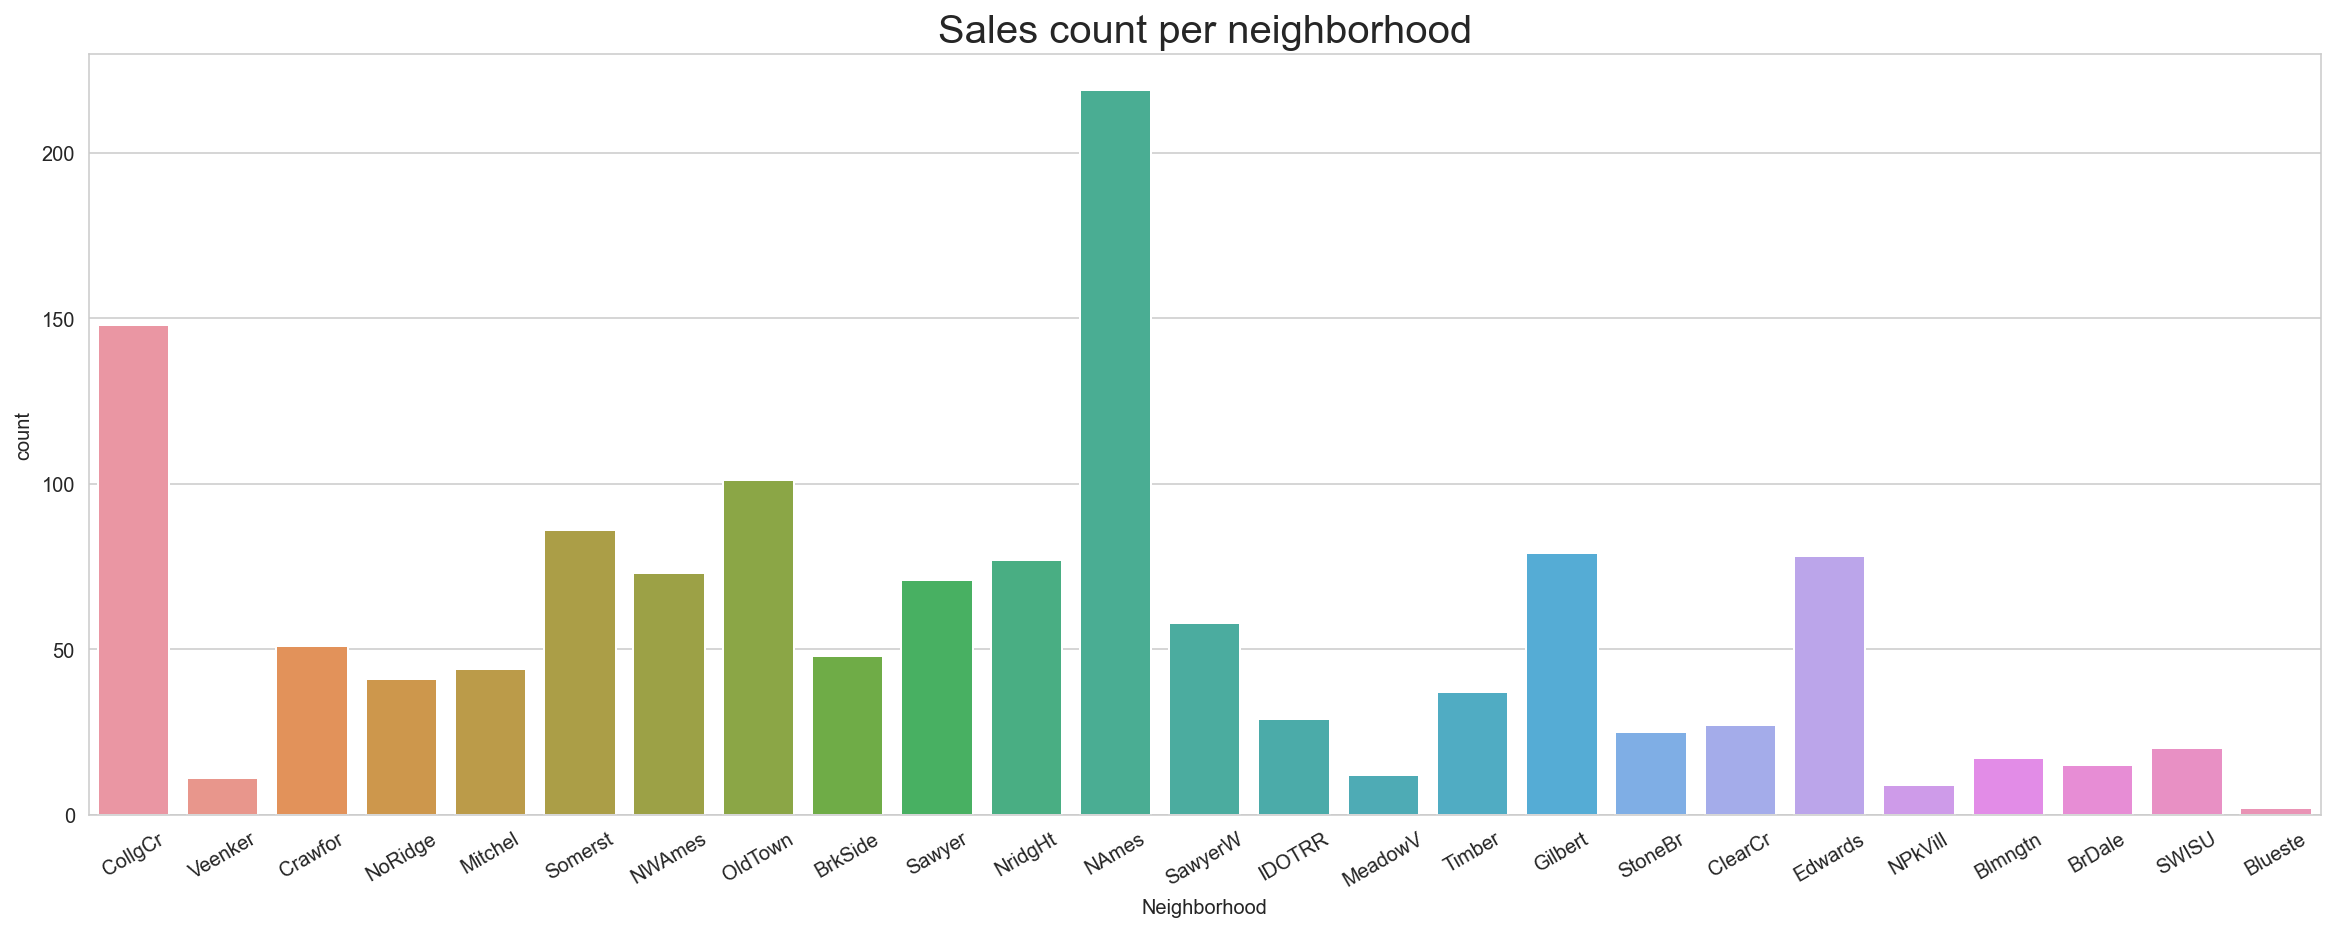

In [152]:
plt.figure(figsize=[20,7])
sns.countplot(train.Neighborhood)
plt.xticks(rotation=30)
plt.title('Sales count per neighborhood', fontsize=20)
plt.show()

In [153]:
train.shape, test.shape

((1378, 80), (1459, 80))

In [154]:
i=[]
for col in train.columns:
    if col not in test.columns:
        i.append(col)

print(i)

['SalePrice']


In [155]:
dummy_1= pd.get_dummies(train[train_obj.columns], drop_first=True)
dummy_test= pd.get_dummies(test[test_obj.columns])

In [156]:
test= pd.concat([test, dummy_test], axis=1)
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0  1461          20       RH         80.0    11622   Pave  No alley access   
1  1462          20       RL         81.0    14267   Pave  No alley access   
2  1463          60       RL         74.0    13830   Pave  No alley access   
3  1464          60       RL         78.0     9978   Pave  No alley access   
4  1465         120       RL         43.0     5005   Pave  No alley access   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4      IR1         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0             1          TA             5        Typ           0   
1             1          Gd             6        Typ           0   
2             1          TA             6        Typ           1   
3          

In [157]:
train= pd.concat([train, dummy_1], axis=1)
train= train.drop(train[train_obj.columns], 1)
train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0         2003           2         548           0           61   
1         1976           2         460         298            0   
2         2001           2         608           0           42   
3         1998           3         642           0           35   
4         2000           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  YrSold  \
0              0          0            0         0        0    2008   
1              0          0            0         0        0    2007   
2              0          0            0         0        0    2008   
3            272          0            0         0        0    2006   
4              0          0            0         0        0    2008   

   SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0     208500            0            0            1            0            1   
1     181500            0            0            1            0            1   
2     223500            0            0            1            0            1   
3     140000            0            0            1            0            1   
4     250000            0            0            1            0            1   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0           0             0             0             1                0   
1           0             0             0             1                0   
2           0             0             0             0                0   
3           0             0             0             0                0   
4           0             0             0             0                0   

   LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
0                0                1                 0                  0   
1                0                1                 0                  0   
2                0                1                 0                  0   
3                0                1              

In [158]:
X= train.drop('SalePrice', 1)
y= train.SalePrice

In [159]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=0)


In [160]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1033, 253), (345, 253), (1033,), (345,))

In [161]:
rf_basic= RandomForestRegressor(random_state=0, n_jobs =-1, oob_score=True, n_estimators=50)
rf_basic.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [162]:
rf_basic.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1, oob_score=True,
                      random_state=0)

In [163]:
rf_basic.oob_score_

0.8227418225641903

In [166]:
sample_tree=rf_basic.estimators_[0]

In [168]:
sample_tree_viz= tree.export_graphviz(sample_tree, out_file=None, feature_names =X.columns.values, filled=True, rounded=True)


In [169]:
from sklearn.metrics import mean_squared_error,r2_score

In [170]:
y_train_pred = rf_basic.predict(X_train)
r2_score(y_train, y_train_pred)

0.9748980836636373

In [171]:
y_test_pred= rf_basic.predict(X_test)
r2_score(y_test, y_test_pred)

0.8875503252351056

In [173]:
n=len(X_test)
k=len(X_test.columns)
adj_r2_score=1 -((1-r2_score(y_test, y_test_pred))*(n-1)/(n-k-1))
print('The adjusted r2 score of y_test, y_pred is:', adj_r2_score)

The adjusted r2 score of y_test, y_pred is: 0.574915515174465


In [174]:
mean_squared_error(y_test, y_test_pred)

696698736.3844684

In [175]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=rf_basic, n_features_to_select=20)

In [176]:
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(n_estimators=50, n_jobs=-1, oob_score=True,
                                    random_state=0),
    n_features_to_select=20)

In [177]:
rfe.ranking_

array([  4,   1,   1,   1,   1,   1,   1,   1,   1,  34,   1,   1,   1,
         1, 128,   1,  25,  89,   1,  33,   6,  18,   1,   5,   1,   1,
         1,   1,   1,  28,  55,  10,  38, 110,   9, 138, 158,  24,  11,
       156, 139, 145, 169,  13, 127, 103,  61, 223,  23, 125, 232,  49,
        60, 163, 202, 186, 131, 150,  47,  27,  69, 117,  90, 182, 143,
        87, 189, 108, 101,  16,  40, 142, 123, 140,  76,  58,  36, 165,
        78,  64, 185, 133, 100, 167, 198, 188, 207, 173, 216, 206, 226,
       218, 225, 149, 161, 152,  96, 179,  99, 190, 175,  79, 159, 135,
        20, 154,  42, 204, 234, 136, 229, 200, 217, 164, 199, 183, 197,
        39, 221,  75, 104, 210,  72,  91, 227,  30,  46,  81, 177, 219,
       155, 153, 233, 112,  74, 168, 114, 211,  73, 201, 160,  17,  70,
       111,  19,  82,  35, 130,   8,  50,  67, 109,  44,  51,  80, 118,
       220, 231, 172,   3,  56, 120, 212,  68,  21,  88,  12,  92,  29,
        71, 102,  85, 113, 187, 116, 144, 119, 151, 162, 215, 20

In [178]:
X_train.columns[rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

In [179]:
X_train2 = X_train.loc[:,rfe.support_]
X_train2.shape

(1033, 20)

In [180]:
X_test2= X_test.loc[:, rfe.support_]

In [181]:
rf=RandomForestRegressor(n_jobs=-1, random_state=0, oob_score=True)

In [182]:
rf.fit(X_train2, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=0)

In [183]:
rf.oob_score_

0.8371728417181619

In [184]:
y_train_pred2 = rf.predict(X_train2)

In [185]:
r2_score(y_train,y_train_pred2)

0.9764087475455854

In [186]:
y_test_pred2 = rf.predict(X_test2)

In [187]:
n= len(X_test)
k=len(X_test.columns)
adj_r2_score= 1 - ((1-r2_score(y_test, y_test_pred2))*(n-1)/(n-k-1))
print('The adjusted r2 score of y_test, y_pred is:', adj_r2_score)

The adjusted r2 score of y_test, y_pred is: 0.5583390463215429
